<a href="https://colab.research.google.com/github/winaryolr/Proyek-Analisis-Data-Dicoding/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Datasets
- **Nama:** Loveta Ramyhaidar Winaryo
- **Email:** mc010d5y1099@student.devacademy.id
- **ID Dicoding:** MC010D5Y1099

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Apa saja faktor yang memengaruhi jumlah penyewaan sepeda dan bagaimana pengaruhnya?
- Pertanyaan 2: Kapan waktu terbaik untuk meningkatkan jumlah sepeda berdasarkan pola *demand*?

## Import Semua Packages/Library yang Digunakan

In [2]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [19]:
dayData_df = pd.read_csv("https://raw.githubusercontent.com/winaryolr/Proyek-Analisis-Data-Dicoding/refs/heads/main/data/day.csv")
dayData_df.head(100)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2011-04-06,2,0,4,0,3,1,1,0.390833,0.387608,0.470833,0.263063,413,2395,2808
96,97,2011-04-07,2,0,4,0,4,1,1,0.437500,0.433696,0.602917,0.162312,571,2570,3141
97,98,2011-04-08,2,0,4,0,5,1,2,0.335833,0.324479,0.836250,0.226992,172,1299,1471
98,99,2011-04-09,2,0,4,0,6,0,2,0.342500,0.341529,0.877500,0.133083,879,1576,2455


In [20]:
hourData_df = pd.read_csv("https://raw.githubusercontent.com/winaryolr/Proyek-Analisis-Data-Dicoding/refs/heads/main/data/hour.csv")
hourData_df.head(100)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2011-01-05,1,0,1,4,0,3,1,1,0.24,0.2273,0.48,0.2239,0,2,2
96,97,2011-01-05,1,0,1,5,0,3,1,1,0.22,0.2273,0.47,0.1642,0,3,3
97,98,2011-01-05,1,0,1,6,0,3,1,1,0.20,0.1970,0.47,0.2239,0,33,33
98,99,2011-01-05,1,0,1,7,0,3,1,1,0.18,0.1818,0.43,0.1940,1,87,88


Legend:
  - *instant* : record index
  - *dteday* : date
  - *season* : season (1:spring, 2:summer, 3:fall, 4:winter)
  - *yr* : year (0: 2011, 1:2012)
  - *mnth* : month ( 1 to 12)
  - *hr* : hour (0 to 23)
  - *holiday* : weather day is holiday or not
  - *weekday* : day of the week
  - *workingday* : if day is neither weekend nor holiday is 1, otherwise is 0.
  - *weathersit* :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
  - *temp* : Normalized temperature in Celsius. The values are divided to 41 (max)
  - *atemp*: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
  - *hum* : Normalized humidity. The values are divided to 100 (max)
  - *windspeed* : Normalized wind speed. The values are divided to 67 (max)
  - *casual* : count of casual users
  - *registered* : count of registered users
  - *cnt* : count of total rental bikes including both casual and registered


**Insight:**

Dari *rawdata* yang diambil, dapat diamati bahwa:
- Jumlah penggunaan sepeda sewa meningkat pada jam-jam beraktivitas.
- Untuk persebaran penggunaan berdasarkan hari belum dapat disimpulkan.

### Assessing Data

In [21]:
dayData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [22]:
dayData_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [23]:
print("Jumlah data day duplikat: ", dayData_df.duplicated().sum())

Jumlah data day duplikat:  0


In [24]:
dayData_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [25]:
hourData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [26]:
hourData_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [27]:
print("Jumlah data hour duplikat: ", hourData_df.duplicated().sum())

Jumlah data hour duplikat:  0


In [28]:
hourData_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Kedua *rawdata* dari *datasets* tidak mengandung duplikasi atau semua *value* adalah unik

### Cleaning Data

Memperbaiki tipe data **dteday** pada data day

In [29]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  dayData_df[column] = pd.to_datetime(dayData_df[column])

In [30]:
dayData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [31]:
dayData_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Memperbaiki tipe data **dteday** pada data hour

In [32]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hourData_df[column] = pd.to_datetime(hourData_df[column])

In [33]:
hourData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [34]:
hourData_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Koreksi tipe data **dteday** yang terbaca oleh perangkat lunak dari objek menjadi *datetime*.

## Exploratory Data Analysis (EDA)

### Explore dayData

In [35]:
dayData_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
222,223,2011-08-11,3,0,8,0,4,1,1,0.717500,0.651521,0.423750,0.164796,812,3980,4792
131,132,2011-05-12,2,0,5,0,4,1,1,0.535000,0.523363,0.747500,0.189667,695,4169,4864
349,350,2011-12-16,4,0,12,0,5,1,2,0.375000,0.359825,0.500417,0.260575,178,3399,3577
227,228,2011-08-16,3,0,8,0,2,1,1,0.700833,0.645837,0.578333,0.236329,721,4004,4725
406,407,2012-02-11,1,1,2,0,6,0,3,0.224167,0.210867,0.731250,0.289796,192,1977,2169


In [36]:
dayData_df.groupby(by="workingday").agg({
    "cnt": ["max", "min", "mean", "std", ]
})

cnt                               
             max  min         mean          std
workingday                                     
0           8714  605  4330.168831  2052.141245
1           8362   22  4584.820000  1878.415583

In [37]:
dayData_df.groupby(by="holiday").agg({
    "cnt": ["max", "min", "mean", "std", ]
})

cnt                                
          max   min         mean          std
holiday                                      
0        8714    22  4527.104225  1929.013947
1        7403  1000  3735.000000  2103.350660

In [38]:
dayData_df.groupby(by="season").agg({
    "cnt": ["max", "min", "mean", "std", ]
})

cnt                                
         max   min         mean          std
season                                      
1       7836   431  2604.132597  1399.942119
2       8362   795  4992.331522  1695.977235
3       8714  1115  5644.303191  1459.800381
4       8555    22  4728.162921  1699.615261

In [39]:
dayData_df.groupby(by="weathersit").agg({
    "cnt": ["max", "min", "mean", "std", ]
})

cnt                               
             max  min         mean          std
weathersit                                     
1           8714  431  4876.786177  1879.483989
2           8362  605  4035.862348  1809.109918
3           4639   22  1803.285714  1240.284449

### Explore hourData

In [40]:
hourData_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
13211,13212,2012-07-09,3,1,7,16,0,1,1,1,0.78,0.6970,0.40,0.2836,88,325,413
10177,10178,2012-03-05,1,1,3,3,0,1,1,1,0.22,0.2273,0.51,0.1642,0,1,1
13249,13250,2012-07-11,3,1,7,6,0,3,1,1,0.64,0.5758,0.89,0.1343,17,168,185
1603,1604,2011-03-12,1,0,3,7,0,6,0,1,0.24,0.2273,0.70,0.1940,4,19,23
6622,6623,2011-10-08,4,0,10,12,0,6,0,1,0.62,0.6212,0.35,0.0000,191,255,446


In [41]:
hourData_df.groupby(by="hr").agg({
    "cnt": ["max", "min", "mean", "std", ]
})

cnt                            
    max min        mean         std
hr                                 
0   283   2   53.898072   42.307910
1   168   1   33.375691   33.538727
2   132   1   22.869930   26.578642
3    79   1   11.727403   13.239190
4    28   1    6.352941    4.143818
5    66   1   19.889819   13.200765
6   213   1   76.044138   55.084348
7   596   1  212.064649  161.441936
8   839   5  359.011004  235.189285
9   426  14  219.309491   93.703458
10  539   8  173.668501  102.205413
11  663  10  208.143054  127.495536
12  776   3  253.315934  145.081134
13  760  11  253.661180  148.107657
14  750  12  240.949246  147.271574
15  750   7  251.233196  144.632541
16  783  11  311.983562  148.682618
17  976  15  461.452055  232.656611
18  977  23  425.510989  224.639304
19  743  11  311.523352  161.050359
20  567  11  226.030220  119.670164
21  584   6  172.314560   89.788893
22  502   9  131.335165   69.937782
23  256   2   87.831044   50.846889

**Insight:**

Dari eksplorasi data yang dilakukan, didapatkan beberapa informasi:
- Rata-rata penggunaan sepeda sewa terjadi pada hari kerja dan non-hari libur. Walaupun didapatkan jumlah penyewaan maksimal yang lebih tinggi di hari libur, nilai standar deviasinya terlampau besar sehingga bersifat volatil atau bisa dikatakan hanya musiman saja.
- Dari segi pengaruh musim, tidak terlalu signifikan karena rata-rata pengunaan sepeda masih hampir identik. Hanya saja pada musim semi, penggunaan sepeda cukup jauh di bawah musim yang lain.
- Dari segi cuaca tentu sangat berpengaruh terhadap penggunaan sepeda. Pengguna hanya menyewa sepeda jika cuaca sedang cerah atau sedikit mendung. Namun jika terjadi hujan ringan atau gerimis pasti lebih sedikit yang menyewa bahkan tidak ada.
- Dari segi jam penggunaan, dapat dilihat dengan rata-rata pengguna 150 ke atas terjadi pada jam 7-21. Jam tersebut merupakan jam berangkat dan pulang kerja, atau jika di hari libur tetap cocok untuk memulai dan mengakhiri aktivitas.

## Visualization & Explanatory Analysis

### Apa saja faktor yang memengaruhi jumlah penyewaan sepeda dan bagaimana pengaruhnya?

Melihat faktor penyewaan per bulan dan per hari

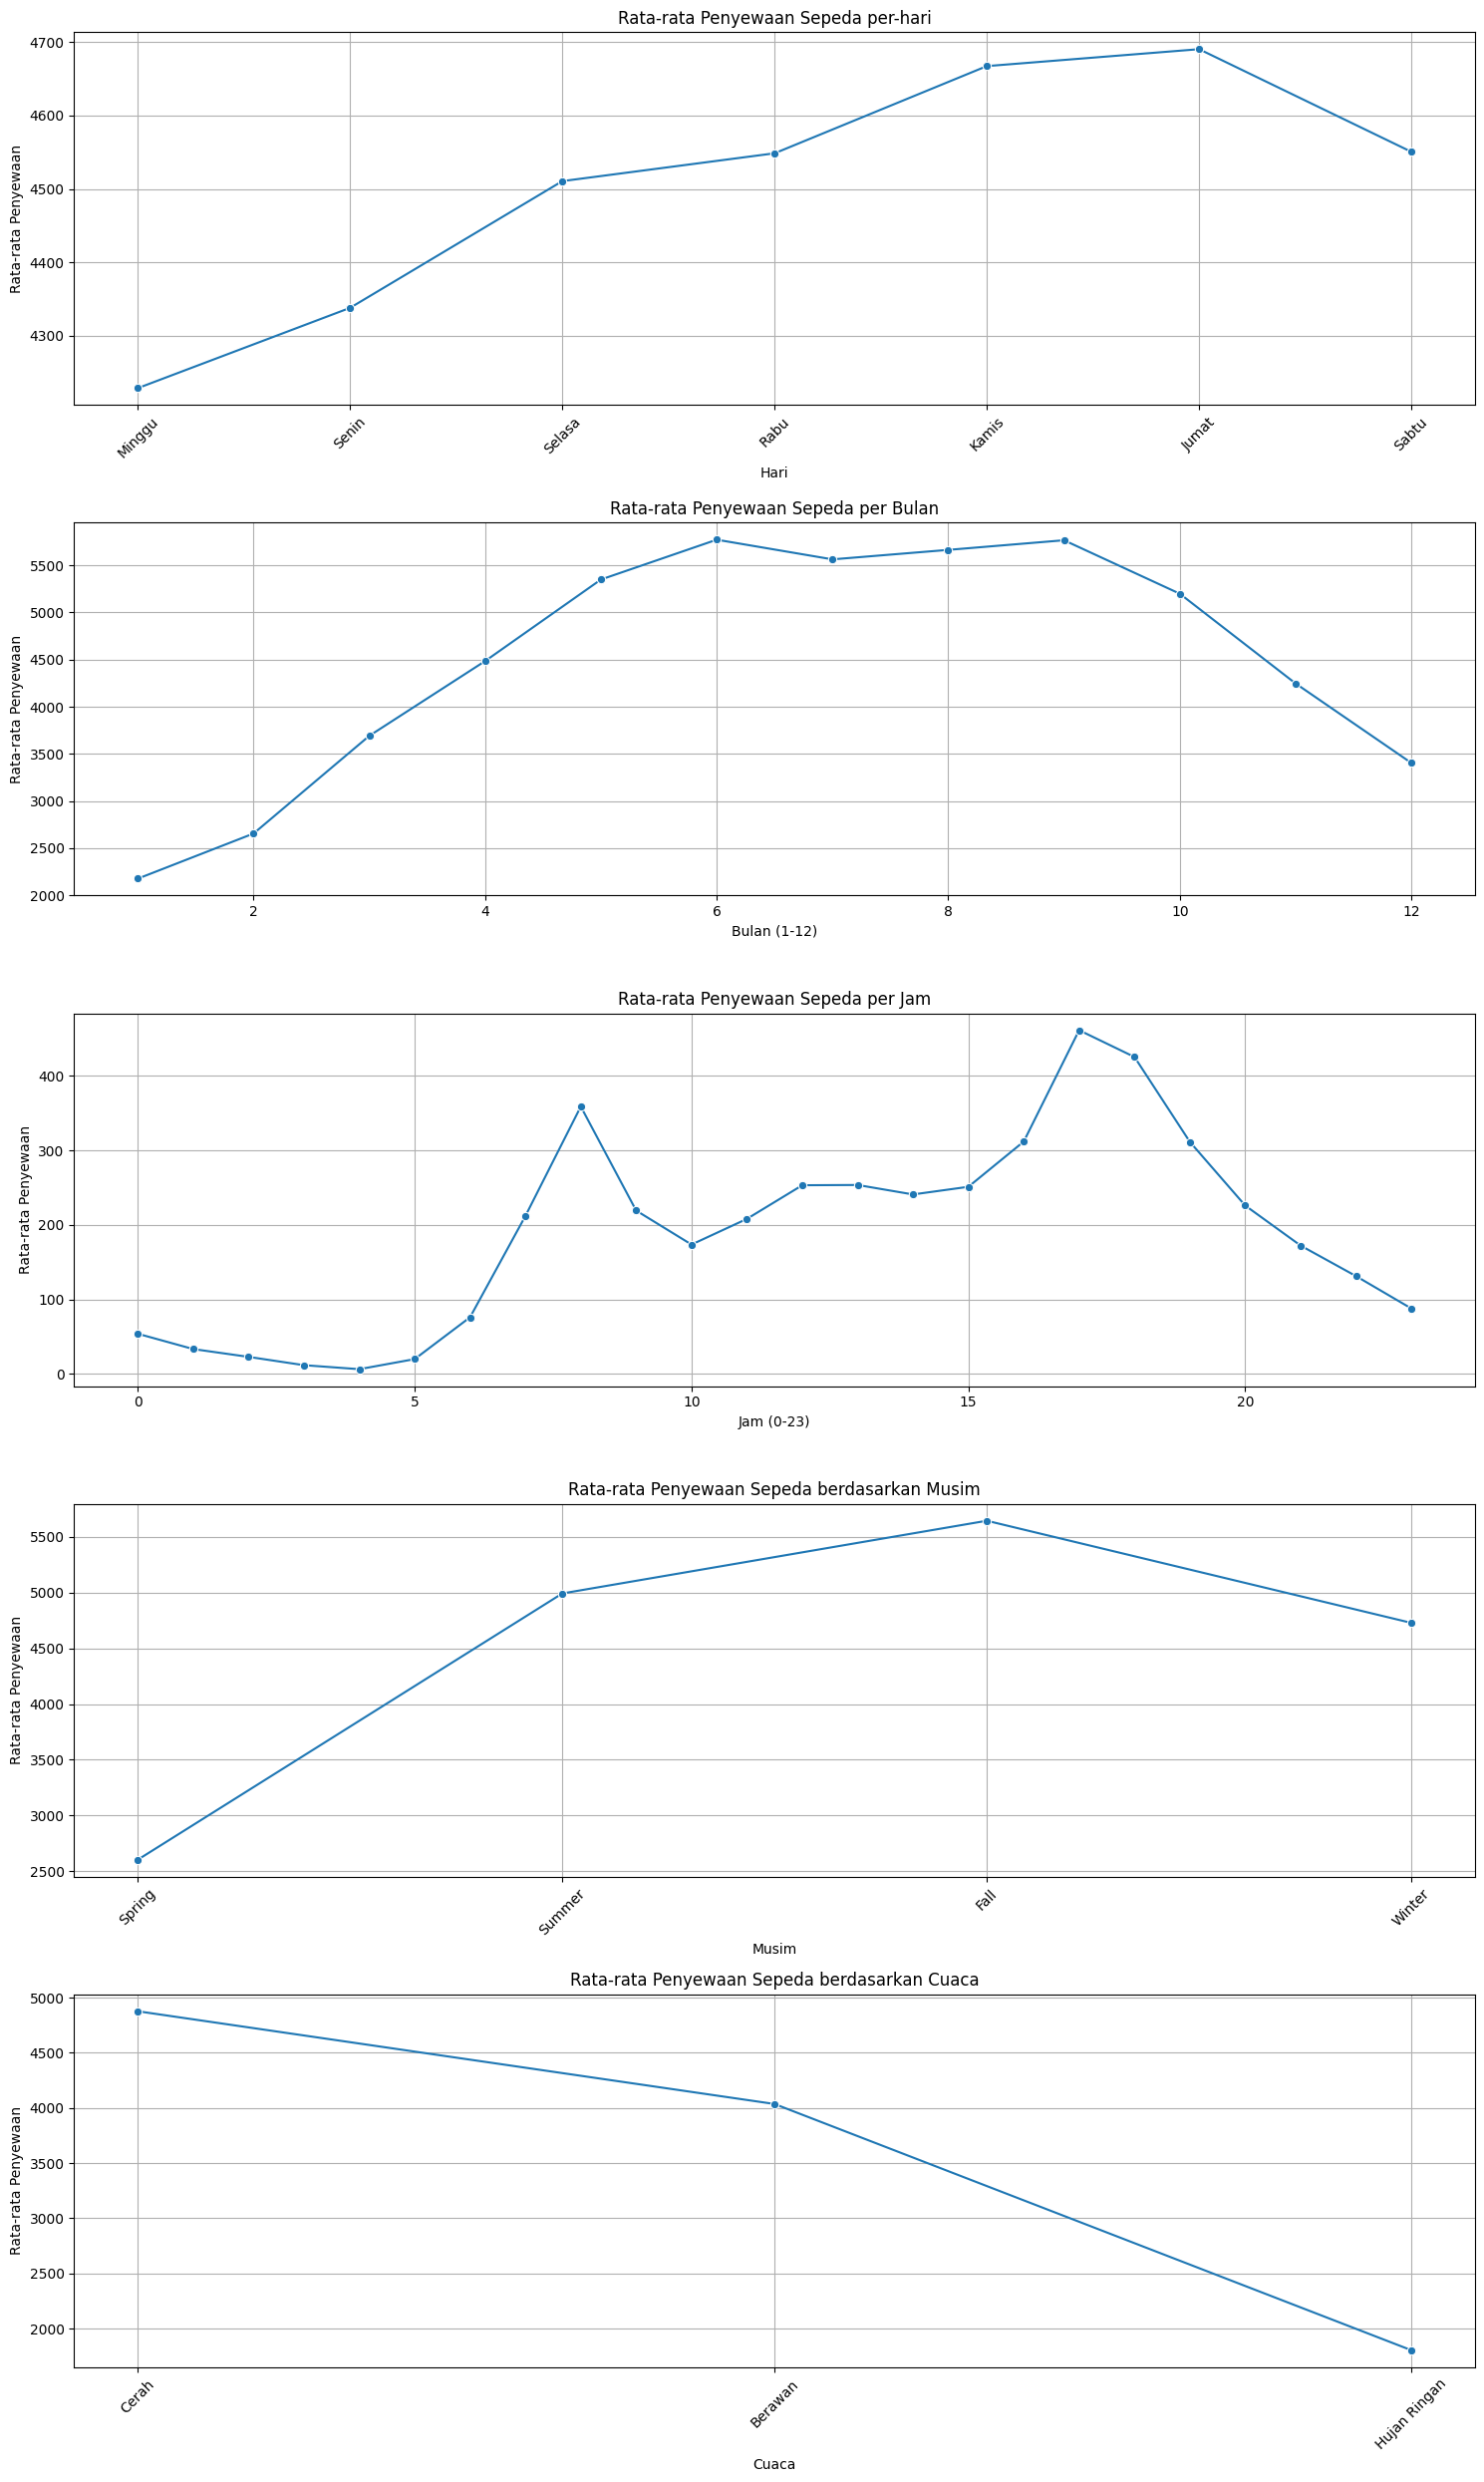

In [49]:
plt.figure(figsize=(15, 25))

weekday_avg = dayData_df.groupby("weekday")["cnt"].mean()
month_avg = dayData_df.groupby("mnth")["cnt"].mean()
hour_avg = hourData_df.groupby("hr")["cnt"].mean()
season_avg = dayData_df.groupby("season")["cnt"].mean()
weather_avg = dayData_df.groupby("weathersit")["cnt"].mean()

plt.subplot(5, 1, 1)
sns.lineplot(x=weekday_avg.index, y=weekday_avg.values, marker='o')
plt.title("Rata-rata Penyewaan Sepeda per-hari")
plt.xlabel("Hari")
plt.ylabel("Rata-rata Penyewaan")
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'])
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(5, 1, 2)
sns.lineplot(x=month_avg.index, y=month_avg.values, marker='o')
plt.title("Rata-rata Penyewaan Sepeda per Bulan")
plt.xlabel("Bulan (1-12)")
plt.ylabel("Rata-rata Penyewaan")
plt.grid(True)

plt.subplot(5, 1, 3)
sns.lineplot(x=hour_avg.index, y=hour_avg.values, marker='o')
plt.title("Rata-rata Penyewaan Sepeda per Jam")
plt.xlabel("Jam (0-23)")
plt.ylabel("Rata-rata Penyewaan")
plt.grid(True)

plt.subplot(5, 1, 4)
sns.lineplot(x=season_avg.index, y=season_avg.values, marker='o')
plt.title("Rata-rata Penyewaan Sepeda berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Penyewaan")
plt.xticks([1, 2, 3, 4], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(5, 1, 5)
sns.lineplot(x=weather_avg.index, y=weather_avg.values, marker='o')
plt.title("Rata-rata Penyewaan Sepeda berdasarkan Cuaca")
plt.xlabel("Cuaca")
plt.ylabel("Rata-rata Penyewaan")
plt.xticks([1, 2, 3], ['Cerah', 'Berawan', 'Hujan Ringan'])
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

### Kapan waktu terbaik untuk meningkatkan jumlah sepeda berdasarkan pola demand?


In [43]:
# Nilai rata-rata tidak perlu dicari ulang karena telah dilakukan pada pertanyaan 1
# Normalisasi nilai dengan menggunakan MinMaxScaler
scaler = MinMaxScaler()
weekday_avg["cnt_normalized"] = scaler.fit_transform(weekday_avg[["cnt"]])
month_avg["cnt_normalized"] = scaler.fit_transform(month_avg[["cnt"]])
hour_avg["cnt_normalized"] = scaler.fit_transform(hour_avg[["cnt"]])
season_avg["cnt_normalized"] = scaler.fit_transform(season_avg[["cnt"]])
weather_avg["cnt_normalized"] = scaler.fit_transform(weather_avg[["cnt"]])

In [44]:
# Menggabungkan Variabel dalam satu DataFrame
combined_df = pd.concat([
    weekday_avg.rename(columns={"weekday": "category", "cnt_normalized": "value"}).assign(feature="weekday"),
    month_avg.rename(columns={"mnth": "category", "cnt_normalized": "value"}).assign(feature="month"),
    hour_avg.rename(columns={"hr": "category", "cnt_normalized": "value"}).assign(feature="hour"),
    season_avg.rename(columns={"season": "category", "cnt_normalized": "value"}).assign(feature="season"),
    weather_avg.rename(columns={"weathersit": "category", "cnt_normalized": "value"}).assign(feature="weather")
])

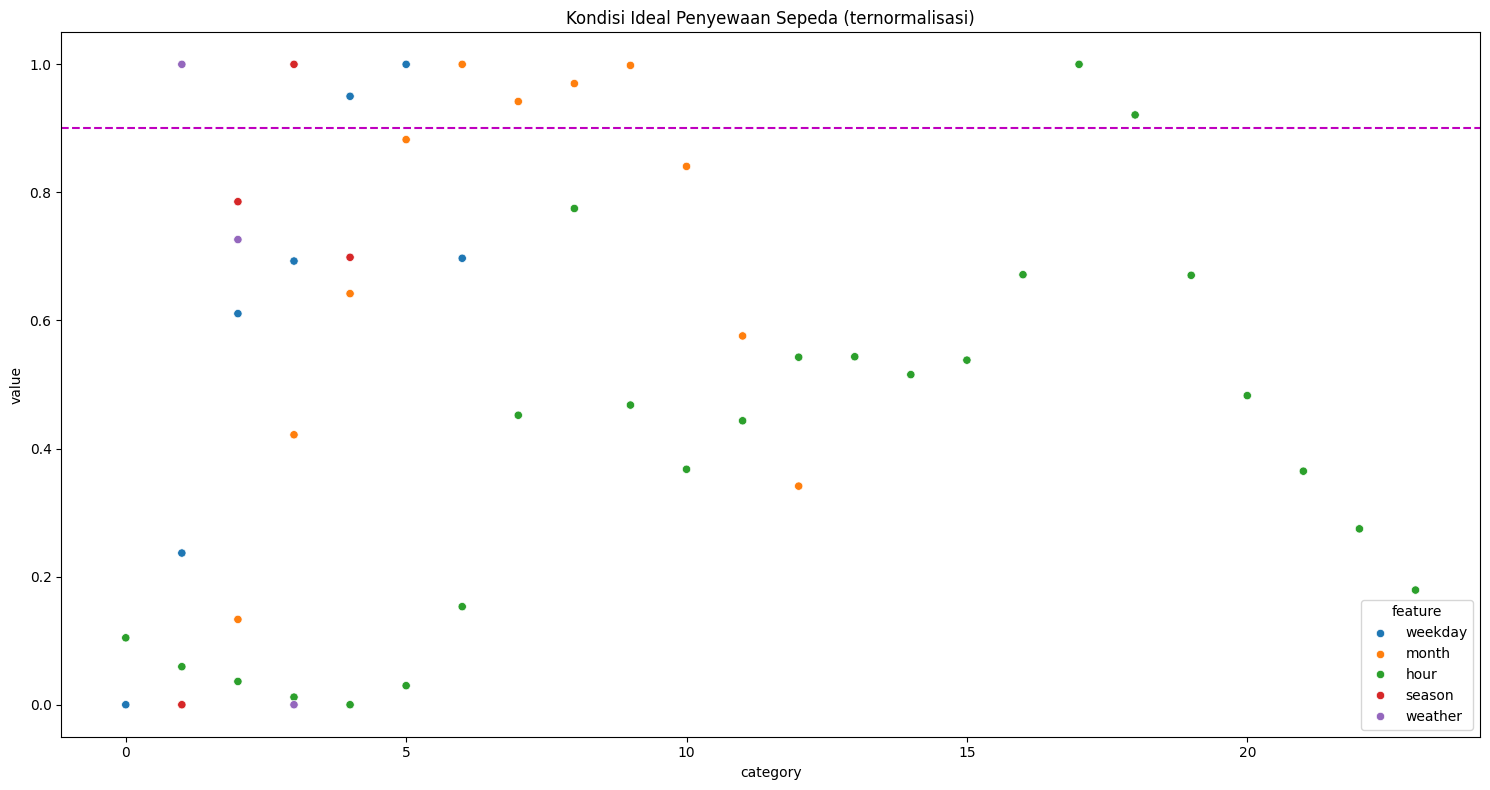

In [54]:
# Plot posisi, mencari kondisi dengan jumlah pengguna rata-rata 90% dari rasio max
plt.figure(figsize=(15, 8))
sns.scatterplot(x="category", y="value", hue="feature", data=combined_df)
plt.axhline(y=0.90, color='m', linestyle='--')
plt.title("Kondisi Ideal Penyewaan Sepeda (ternormalisasi)")
plt.tight_layout()
plt.show()

**Insight:**
- Tren penyewaan sepeda berdasarkan hari meningkat pada hari kerja dari Senin hingga Jumat lalu turun saat akhir pekan. Pada jam pemakaian juga terjadi peningkatan pada jam kerja, terutama saat berangkat dan pulang kantor.
- Tren penyewaan sepeda berdasarkan bulan dan musim mengalami peningkatan dari awal tahun hingga puncaknya pada musim gugur sebelum turun pada musim dingin.
- Cuaca juga mempengaruhi tren penyewaan sepeda, dimana pengguna hanya merasa nyaman bersepeda ketika cuaca cerah, mulai waspada saat mendung, dan memilih tidak bersepeda saat gerimis.
- Dari beberapa kondisi tren tersebut, didapati bahwa kondisi yang paling sibuk yakni pada musim gugur, saat cuaca cerah pada jam pulang kerja (16-18) di hari kamis dan jumat.


## Analisis Lanjutan (Opsional)

### Clustering dengan Binning

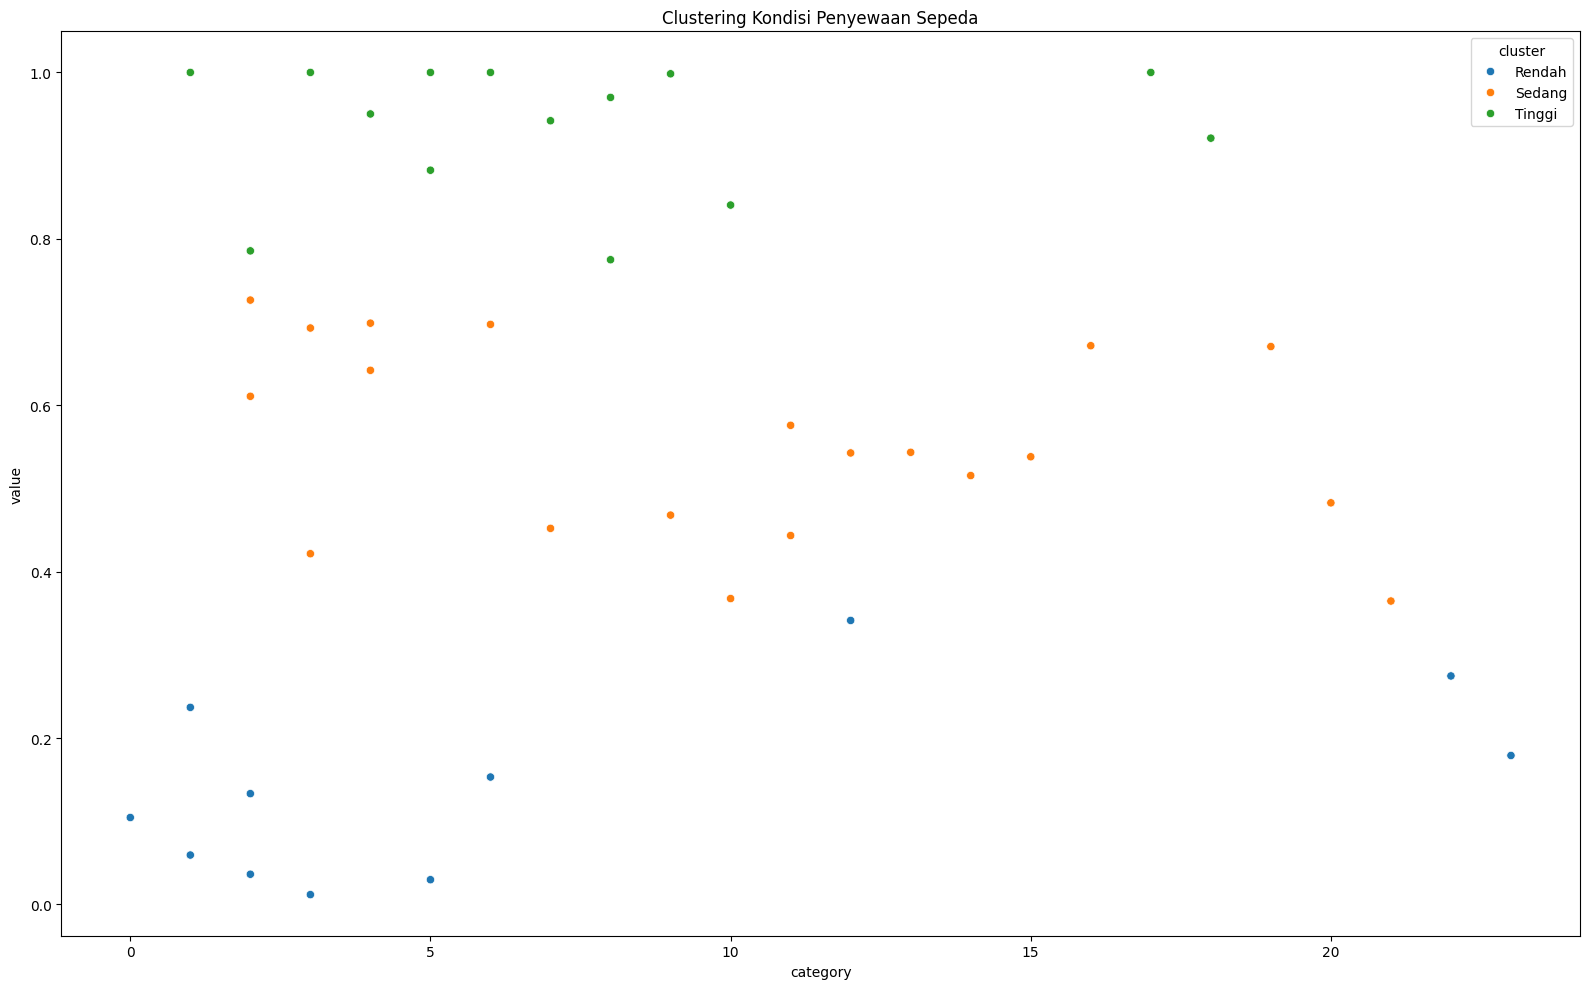

In [58]:
# Kita coba clustering pake binning
bins = [0, 0.35, 0.75, 1]
labels = ["Rendah", "Sedang", "Tinggi"]
combined_df["cluster"] = pd.cut(combined_df["value"], bins=bins, labels=labels)

# Visualisasi
plt.figure(figsize=(16, 10))
sns.scatterplot(x="category", y="value", hue="cluster", data=combined_df)
plt.title("Clustering Kondisi Penyewaan Sepeda")
plt.tight_layout()
plt.show()

## Conclusion

**Kesimpulan Pertanyaan 1**
- Tren penyewaan sepeda berdasarkan hari meningkat pada hari kerja dari Senin hingga Jumat lalu turun saat akhir pekan. Pada jam pemakaian juga terjadi peningkatan pada jam kerja, terutama saat berangkat dan pulang kantor.
- Tren penyewaan sepeda berdasarkan bulan dan musim mengalami peningkatan dari awal tahun hingga puncaknya pada musim gugur sebelum turun pada musim dingin.
- Cuaca juga mempengaruhi tren penyewaan sepeda, dimana pengguna hanya merasa nyaman bersepeda ketika cuaca cerah, mulai waspada saat mendung, dan memilih tidak bersepeda saat gerimis.

**Kesimpulan Pertanyaan 2**
- Dari beberapa kondisi tren tersebut, didapati bahwa kondisi yang paling sibuk yakni pada musim gugur, saat cuaca cerah pada jam pulang kerja (16-18) di hari kamis dan jumat. Sehingga jika perusahaan sedang berada di kondisi itu harus mempersiapkan unit sepeda yang cukup.